# How are Crime Metrics in Baltimore Between 2011 - 2017 Affected by Temperature Fluctuations, Being Indoors/Outdoors, Variation in Police Districts, and Time of Day?

*By Ryan Hu*

*March 3rd, 2023*

*Github Repository: https://github.com/rhu2002/ECO225-Project-2*

# Project One

## Introduction

### Motivation of Research
For centuries now, crime has been a major societal problem. With the advancements of civilization and technology, crime has evolved in its forms and fluctuated in its magnitudes. Today, Baltimore is typically perceived as an extremely dangerous city with high theft and crime rates. According to PropertyClub, it constantly cracks the top ten list for most dangerous cities in the United States. With a population over 500,000, it has become a Maryland state-wide issue forcing officials to study and attempt to mitigate crime levels. Furthermore, it has also become a safety concern to prestigious educational institutions in close proximity to the city, such as the world renowned John Hopkins University. Thus, this pressing safety concern has sparked my interest and led to this project's research question: **How are Crime Metrics in Baltimore Between 2011 - 2017 Affected by Temperature Fluctuations, Being Indoors/Outdoors, Variation in Police Districts, and Time of Day.**

Taking it one step further, we studied how arrest rates faired against thefts and overall crimes. It is not enough to simply point out Baltimore's safety flaws, but we must also provide insight and astute reccomendations on how to address this problem. Hence, this search for a solution has led to the expansion into relevant arrest rate data. All in all, these additional metrics will further advance our attempt to provide viable solutions through newfound insight. 

### Background Information
According to CriminalDefenseLawyer, theft in the state of Maryland is legally defined as "A person commits theft in Maryland by taking someone else's property without authorization or by deceit and either intending to deprive the owner of their property, or willfully or knowingly using, concealing, or abandoning the property in a way that actually deprives the owner of their property". This official definition is critical to defining what types of crimes are categorized as thefts in our project.

### Structure
For the first half of the project, we have chosen to study theft frequency in the city of Baltimore. To do this, we utilize the variables of "Indoor", "District", and "CrimeTime" in the Crime in Baltimore dataset along with the variable "temp" in the Baltimore Historical Weather Report dataset as metrics for the explanatory variables. This half intends to study this relationship by merging both the Crime in Baltimore dataset from Kaggle and the Baltimore Historical Weather Report dataset from the weather API Visual Crossing. Doing this will allow us to study the relationship by utilizing a count of dummy variables for "Theft" as an indicator of theft frequency (dependent y-variable), and the variables of "temp", "Indoor", "District", and "CrimeTime" as four explanatory variables (independent x-variables).

For the second half of the project, we have decided to add and measure new dependent variables: theft rate, share of theft, theft arrest rate, and crime arrest rate. With the addition of the Baltimore Arrest dataset, we are able to calculate these four metrics in tandem with our original Crime in Baltimore dataset. All crime metrics are defined below for clarity.

### Crime Metric Definitions
**Theft Frequency:** The number of theft occurences within a district

**Theft Rate:** The percentage of crimes that were thefts within a district

**Theft Arrest Rate:** The percentage of theft crimes that resulted in arrest within a district

**Crime Arrest Rate:** The percentage of crimes that resulted in arrest within a district

**Share of Theft:** The percentage of all thefts that occured within a district

### Summary of Findings

#### Theft Frequency - Dependent Variable
The findings present that theft frequency is contingent on the time of day, police district, temperature, and indoor/outdoor location. It is important to note that even after controlling for all explanatory variables, bias of different forms is inevitable.

#### Theft Rate - Dependent Variable
The findings present that theft rate is dependent on the police district. The visualization data shows that the Northwestern district experienced the highest proportion of theft to crimes, whereas the Western and Eastern districts experienced the lowest proportion of theft to crimes.

#### Share of Theft - Dependent Variable
The findings present that share of theft is dependent on the police district. The visualization data shows that the Northeastern and Southeastern districts experienced the most thefts, whereas the Western and Eastern districts experienced the least thefts.

#### Theft Arrest Rate - Dependent Variable
The findings present that theft arrest rate is dependent on the police district. The visualization data shows that the Southern district had the best record at arresting thieves, whereas the Northern district had the worst record at arresting thieves.

#### Crime Arrest Rate - Dependent Variable
The findings present that crime arrest rate is dependent on the police district. The visualization data shows that the Southeastern district had the best record at arresting criminals, whereas the Southern district had the worst record at arresting criminals.

#### Temperature - Independent Variable
The graphical data portrays that theft frequency peaks around room temperature. The findings here show that settings around room temperature levels (68–72 °F) experience more theft than extremely hot and cold settings.

#### Time of Day - Independent Variable
The graphical data presents theft frequency apexing around the early evening and bottoming out in the early morning. The findings here show that thieves typically conduct heists in limited daylight when the sun is setting and avoid illuminated hours when the sun is rising.

#### Indoor/Outdoor Location - Independent Variable
The graphical data depicts that theft frequency is higher in outdoor locations by a large margin. The findings here show that areas in outdoor locations are more prone to theft when compared to indoor locations.

#### Police District - Independent Variable
The graphical data displays that theft frequency varies across police districts by noticeable magnitudes. The findings here show that the Northeastern and Southeastern districts are most prone to theft, while the Eastern and Western districts are least prone to theft.

### Data Sources
The source of the Crime in Baltimore dataset is the highly reputable Uniform Crime Reporting Program (UCRP) found on the FBI's official government website and eventually transferred onto Kaggle. The source of the Baltimore Historical Weather Report dataset is one of the world's top weather APIs: Visual Crossing. The source of the Baltimore Police District Boundaries shapefile is ArcGIS. The source of the Baltimore Arrest dataset is the official Baltimore City Government website.

## Literature Review
The Economics of Crime is a widely sought-after field with many scholars publishing award winning pieces of research. Among this field, the common theme of studying the relation between crime levels and large urban cities arises. In their piece titled *Why is There More Crime in Cities?*, Glaeser and Sacerdote convey the general trend that crimes are much more abundant and severe in large urban cities *(Glaeser & Sacerdote, 1999)*. The authors choose to utilize statistics from the Uniform Crime Reporting Program (UCRP), drawing several parallels to my own research and sources. Glaeser and Sacerdote hypothesize that higher pecuniary benefits, lower probabilities of arrest and recognition, and more male dominance among head of households are ultimate drivers of elevated crime levels within cities. In my own research, I touch upon similar aspects such as probabilities for different types of arrest, but also add innovative locational variables such as police district. By taking this new and unique direction, I hope to provide undiscovered insight on possible solutions to a larger societal problem: community safety.

## Import Libraries

In [1]:
import pandas as pd # Import the pandas library
import numpy as np # Import the numpy library
import matplotlib.pyplot as plt # Import the matplotlib.pyplot library
import matplotlib.ticker as mtick
import datetime as dt # Import the datetime library
import geopandas as gpd # Import the geopandas library
from shapely.geometry import Point # Import the shapely library
import qeds # Import the qeds library
import folium # Import the folium library
from folium.plugins import HeatMap # Import the heatmap library
import os # Import the os library
import warnings # Import the warnings library
warnings.filterwarnings('ignore') # Ignore all warnings

# Activate plot theme
%matplotlib inline

## Data Cleaning/Loading

In [2]:
df = pd.read_csv("/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/BPD_Part_1_Victim_Based_Crime_Data.csv") # Read the Crime in Baltimore CSV file from Kaggle
df_weather = pd.read_csv("/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/Historical_Weather_Data_for_Baltimore_MD.csv") # Read the Baltimore Historical Weather Report CSV file from Visual Crossing
bal_df = gpd.read_file("/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/BPD_Boundaries/police_district.shp") # Read the Baltimore Police District Boundaries shapefile from ArcGIS
arrest_df = pd.read_csv("/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/BPD_Arrest_Data.csv", low_memory=False) # Read the Baltimore Arrest CSV file from the Baltimore Police Department

In [3]:
df['Theft'] = [int(x in ('AUTO THEFT', 'Burglarly', 'LARCENY',
                         'LARCENY FROM AUTO', 'ROBBERY - CARJACKING',
                         'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE',
                         'ROBBERY - STREET')) for x in df['Description']] # Create a new column theft with dummy variables for each crime
df['Indoor'] = [int(x in ('I', 'Inside')) for x in df['Inside/Outside']] # Create a new column indoor with dummy variables for each crime

In [4]:
df['CrimeDate'] = pd.to_datetime(df.CrimeDate, format = '%m/%d/%y') # Split up date format
df['Month'] = df['CrimeDate'].dt.month # Create new column for month and add each month
df['Day'] = df['CrimeDate'].dt.day # Create new column for day and add each day
df['Year'] = df['CrimeDate'].dt.year # Create new column for year and add each year
df_weather['datetime'] = pd.to_datetime(df_weather.datetime, format = '%m/%d/%y') # Split up date format
df_weather['Month'] = df_weather['datetime'].dt.month # Create new column for month and add each month
df_weather['Day'] = df_weather['datetime'].dt.day # Create new column for day and add each day
df_weather['Year'] = df_weather['datetime'].dt.year # Create new column for year and add each year

In [5]:
df_merge = pd.merge(df, df_weather, on = ['Month', 'Day', 'Year']) # Merge the crime and weather dataframe on month, day, and year
df_total = df_merge[['CrimeDate', 'CrimeTime', 'District', 'temp', 'Theft',
                     'Indoor']] # Filter the merged dataframe to include only relevant columns
df_total = df_total.dropna(how = 'any', axis = 0) # Clean the dataframe by dropping all empty observations
df_weapon = df.dropna(how='any', axis=0) # Clean the dataframe by dropping all empty observations
df_weapon['Theft'] = [int(x in ('AUTO THEFT', 'Burglarly', 'LARCENY',
                         'LARCENY FROM AUTO', 'ROBBERY - CARJACKING',
                         'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE',
                         'ROBBERY - STREET')) for x in df_weapon['Description']] # Create a new column theft with dummy variables for each crime
df_weapon['Indoor'] = [int(x in ('I', 'Inside')) for x in df_weapon['Inside/Outside']] # Create a new column indoor with dummy variables for each crime

In [6]:
# Create a new column to filter for arrest thefts while accounting for the typos
arrest_df['Arrest_Theft'] = np.where(arrest_df['ChargeDescription'].str.contains('BURGLARY') |
                                   arrest_df['ChargeDescription'].str.contains('CAR JACKING') |
                                   arrest_df['ChargeDescription'].str.contains('ROBBERY') |
                                   arrest_df['ChargeDescription'].str.contains('THEFT') |
                                   arrest_df['ChargeDescription'].str.contains('LARCENY') |
                                   arrest_df['ChargeDescription'].str.contains('LARIENCY') |
                                   arrest_df['ChargeDescription'].str.contains('LARCRNY') |
                                   arrest_df['ChargeDescription'].str.contains('LARCENCY') |
                                   arrest_df['ChargeDescription'].str.contains('LAQRCENY') |
                                   arrest_df['ChargeDescription'].str.contains('BREAKING AND ENTERING') |
                                   arrest_df['ChargeDescription'].str.contains('B&E') | 
                                   arrest_df['ChargeDescription'].str.contains('STOLE'), True, False)
arrest_df['Year']  = arrest_df['ArrestDateTime'].apply(lambda x: x[:4]) # Create a column with the year from the date
arrest_df = arrest_df.loc[arrest_df['IncidentOffence'] != 'Unknown Offense'] # Eliminate all unknown offense occurences
arrest_df = arrest_df.drop(columns = ['Shape']) # Drop the shape column
arrest_df = arrest_df.dropna() # Clean out the empty observations of the dataframe

In [7]:
arrest_groups_df = arrest_df.loc[arrest_df['District'] != 'Sd5'] # Drop the unnecessary district
arrest_groups_df = (arrest_groups_df.groupby(['District']).sum()) # Group the dataframe by district
arrest_groups_df = arrest_groups_df.reset_index() # Reset the index
theft = df_total.groupby(['District']).sum()['Theft'] # Sum up the number of thefts per district
theft = theft.reset_index() # Reset the index
theft = theft['Theft'] # Filter for relevant column
arrest_groups_df = arrest_groups_df.merge(theft, left_index = True,
                                          right_index = True) # Merge the series onto the dataframe
arrest_groups_df['Arrest Rate'] = arrest_groups_df['Arrest_Theft'] / arrest_groups_df['Theft'] # Calculate the proportion of thefts that were arrests
arrest_groups_df['Arrest Percentage'] = arrest_groups_df['Arrest Rate'] * 100 # Calculate the percentage of thefts that were arrests

In [8]:
thefts_by_district = pd.Series(df.groupby(['District']).sum()['Theft'],
                               name = 'Thefts') # Count up the number of thefts for each district
crimes_by_district = pd.Series(df.groupby(['District']).count()['Theft'],
                               name = 'Crimes') # Count up the number of crimes for each district
crimes_by_district = crimes_by_district.reset_index() # Reset the index
crimes_by_district = pd.Series(crimes_by_district['Crimes'],
                               name = 'Crimes') # Format the series correctly for future joining
arrest_df = arrest_df.loc[arrest_df['District'] != 'Sd5'] # Eliminate the weird district
arrest_df['Month'] = pd.DatetimeIndex(arrest_df['ArrestDateTime']).month # Create the month column
theft_arrests_by_district = pd.Series(arrest_df.groupby(['District'])
                                      .sum()['Arrest_Theft'],
                                      name = 'Theft Arrests') # Sum up the number of theft arrests per district
theft_arrests_by_district = theft_arrests_by_district.reset_index() # Reset the index
theft_arrests_by_district = pd.Series(theft_arrests_by_district['Theft Arrests'],
                                      name = 'Theft Arrests') # Format the series correctly for future joining
thefts_by_district = pd.DataFrame(thefts_by_district) # Change the format to a dataframe
thefts_by_district = thefts_by_district.reset_index() # Reset the index

In [9]:
total_arrests_by_district = pd.Series(arrest_df.groupby(['District'])
                                      .count()['Arrest_Theft'],
                                      name = 'Total Arrests') # Count how many arrest thefts by district and change to a series
total_arrests_by_district = total_arrests_by_district.reset_index() # Reset the index
total_arrests_by_district = pd.Series(total_arrests_by_district['Total Arrests'],
                                      name = 'Total Arrests') # Change to a series
final_arrests_table = thefts_by_district.join(crimes_by_district).join(theft_arrests_by_district).join(total_arrests_by_district) # Join everything on to the dataframe
final_arrests_table['Theft Arrest Rate'] = final_arrests_table['Theft Arrests'] / final_arrests_table['Thefts'] # Create theft arrest rate column
final_arrests_table['Theft Rate'] = final_arrests_table['Thefts'] / final_arrests_table['Crimes'] # Calculate theft rate
thefts_by_month = pd.Series(df.groupby(['Month']).sum()['Theft'],
                            name = 'Thefts') # Sum up the number of thefts per month
thefts_by_month = pd.DataFrame(thefts_by_month) # Change the format to a dataframe
thefts_by_month = thefts_by_month.reset_index() # Reset the index
crimes_by_month = pd.Series(df.groupby(['Month']).count()['Theft'],
                            name = 'Crimes') # Sum up the number of crimes per month
crimes_by_month = crimes_by_month.reset_index() # Reset the index
crimes_by_month = pd.Series(crimes_by_month['Crimes'],
                            name = 'Crimes') # Change format to series
theft_arrests_by_month = pd.Series(arrest_df.groupby(['Month'])
                                   .sum()['Arrest_Theft'],
                                   name = 'Theft Arrests') # Sum up the number of theft arrests per month
theft_arrests_by_month = theft_arrests_by_month.reset_index() # Reset the index
theft_arrests_by_month = pd.Series(theft_arrests_by_month['Theft Arrests'],
                                   name = 'Theft Arrests') # Change format to series
month_table = thefts_by_month.join(crimes_by_month).join(theft_arrests_by_month) # Join everything onto the dataframe
month_table['Theft Arrest Rate'] = month_table['Theft Arrests'] / month_table['Thefts'] # Create theft arrest rate column
month_table['Theft Rate'] = month_table['Thefts'] / month_table['Crimes'] # Calculate the theft rate
final_arrests_table['Crime Arrest Rate'] = final_arrests_table['Total Arrests'] / final_arrests_table['Crimes'] # Calculate the crime arrest rate

## Summary Statistics Tables

In [10]:
theft = df_total[df_total['Theft'] == 1].describe() # Assign theft summary statistics to a variable
theft.drop(columns = ['Theft'], inplace = True) # Drop unneccesary column
column = pd.Series(df_total['Theft'].describe(), name = 'Proportion of Theft') # Assign proportion of theft summary statistics to a variable
combined = theft.join(column) # Join columns together
combined # Summary statistics for float type variables - dependent and independent variables

,temp,Indoor,Proportion of Theft
count,149815.000000,149815.000000,276380.000000
mean,58.659896,0.318693,0.542062
std,16.763435,0.465971,0.498229
min,9.500000,0.000000,0.000000
25%,44.900000,0.000000,0.000000
50%,60.400000,0.000000,1.000000
75%,73.600000,1.000000,1.000000
max,91.300000,1.000000,1.000000


The summary statistics table presents all 276,380 crimes, with 149,815 of them being thefts. This table portrays the summary statistics for all float type variables, resulting in data for the mean, median, and other empirical statistics.

For proportion of theft, the mean represents the proportion of crimes that are theft. Hence, 54.2062% of all crimes were theft-related. The median is 1.0, representing the dummy for a theft-related crime. This means that there are more theft-related crimes than non-theft related crimes. For my research, the mean suggests that theft crimes are more prevalent than non-theft crimes.

As observed, the average temperature for all theft-related crimes was 58.659896 degrees Farenheit. The minimum temperature recorded during a theft-related crime was 9.5 degrees Farenheit. The maximum temperature recorded during a theft-related crime was 91.3 degrees Farenheit. Notably, the median is slightly higher than the mean, signifying the data is skewed towards the left tail. For my research, this suggests that thefts typically occur more frequently during warmer than average temperatures.

According to the table, the mean for being indoors is 0.318693, representing that 31.8693% of theft-related crimes occured indoors. The median is 0.0, representing the dummy for an outdoor theft. This means that there are more outdoor thefts than indoor thefts. For my research, this suggests that the chance of theft occuring is more likely outdoors than indoors.

In [11]:
district = df_total[df_total['Theft'] == 1.0]['District'].describe() # Assign district summary statistics to a variable
district = pd.Series(district, name = 'District') # Assign a name to the series
district = pd.DataFrame(district) # Convert the series to a datafrane
time = df_total[df_total['Theft'] == 1.0]['CrimeTime'].describe() # Assign time summary statistics to a variable
time = pd.Series(time, name = 'Time') # Assign a name to the series
joined = district.join(time) # Join the time series onto the district dataframe
joined # Summary statistics for string type variables - independent variables

,District,Time
count,149815,149815
unique,9,1440
top,NORTHEASTERN,18:00:00
freq,22815,4642


The summary statistics table presents all 149,815 theft-related crimes. This table portrays the summary statistics for all string type variables, resulting in data for the mode and other statistics.

As depicted, the top district with the most theft-related crimes was Northeastern with 22,815 recorded thefts. Through a simple calculation, we can see that the Northeastern district was responsible for about 15% of all thefts. This proportion seems large as the data depicts that there are nine distinct districts in Baltimore where all instances of theft occured. For my research, this suggests that Northeastern is the district that is most prone to theft.

For time of crime, there are 1,440 unique minute time stamps that show theft-related crimes spanning across all hours of the day. The data portrays that the most frequent time of day for theft-related crimes is 6 PM EST. Thefts that happened at this time summed up to 4,642 instances, representing about 3% of all thefts. This table supports the widely accepted notion that theft-related crimes are more likely to happen later at night when it is dark and less visible. For my research, this suggests that there are more observations of theft-related crimes during the night hours due to the absence of the sun reducing lighting, making it easier to execute theft.

## Plots, Histograms, and Figures

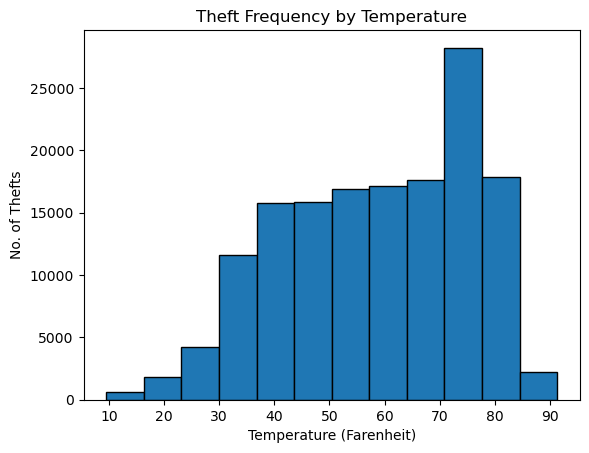

In [12]:
x = df_total[df_total['Theft'] == 1]['temp'] # Make a column with all temperatures where theft happened

# Create the Theft Frequency by Temperature histogram
plt.hist(x, bins = 12, ec = 'black') # Make the histogram 
plt.xlabel('Temperature (Farenheit)') # Label the x-axis
plt.ylabel('No. of Thefts') # Label the y-axis
plt.title('Theft Frequency by Temperature') # Title the graph
plt.show() # Present the Theft Frequency By Temperature histogram

In this first histogram, we can see the relationship between the number of thefts and temperature in the unit of Farenheit. The reason that this relationship is best depicted in a histogram is because of the continuous nature of the temperature data. We want to study and see if thefts occur at normal levels in extremely hot and cold settings.

As we can visually tell, the number of thefts drops significantly at both tails of the data, suggesting that extremely hot and cold environments discourage theft from occuring. This could be attested to the fact that thieves do not want to conduct theft in unconfortable temperatures, especially when most thefts take place outdoors. Additionally, there is the possibility that the sample of days with extremely hot and cold temperatures is limited, thus granting less opportunity for theft to occur. We can see a large spike in the number of thefts between 70 and 80 degrees Farenheit, showing a higher tendency for the execution of a theft around room temperature: 68 degrees Farenheit. 

As a result, we can conclude that there is a correlation between temperature and theft frequency, further enhancing the research question. Whether this correlation depends on if thieves base their theft-decisions on comfortable temperatures or the number of available days at certain temperatures remains ambiguous and open to further research.

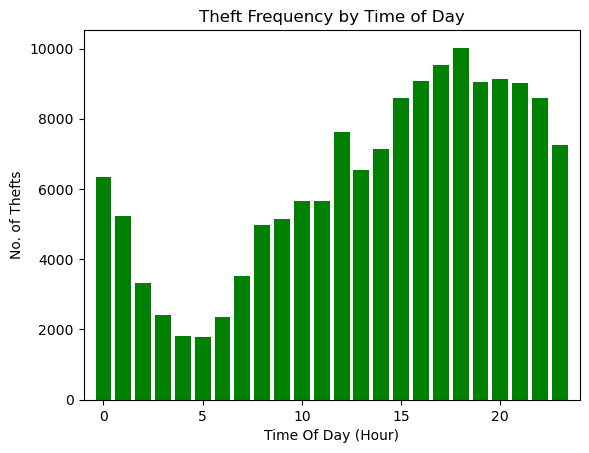

In [13]:
df_total['hour'] = df_total['CrimeTime'].str.split(':').str[0] # Slice everything up until the first colon in column CrimeTime
df_total['hour'] = df_total['hour'].astype('int') # Convert the hour column from string to integer
by_hour = df_total.groupby(['hour']).sum() # Group by the hour to count thefts per hour
by_hour = by_hour.reset_index() # Reset the index back to default
by_hour = by_hour.loc[by_hour['hour'] != '24'] # Eliminate the singular row where the time is 24

# Create the Theft Frequency by Time of Day bar chart
plt.bar(by_hour['hour'], by_hour['Theft'], color = 'green') # Make the bar chart
plt.xlabel('Time Of Day (Hour)') # Label the x-axis
plt.ylabel('No. of Thefts') # Label the y-axis
plt.title('Theft Frequency by Time of Day') # Title the graph
plt.bar(by_hour['hour'], by_hour['Theft'], color = 'green') # Make the bar chart
plt.xlim(-1, 24) # Set the x-axis limit to 24 hours in a day
plt.show() # Present the Theft Frequency By Time of Day bar chart

In this bar chart, we can see the relationship of the hourly number of thefts over the course of the six years. To account for all six years, the data is grouped by hour to accumulate all the thefts that occured in a specific hour. A bar chart is an optimal graph choice for this relationship because it allows us to simultaneously analyze all 24 hours of the day and their theft frequencies.

The highest theft frequency starts to peak around late afternoon and early evening. This bolsters the widely accepted logic that thefts typically occur during darker hours when there is less prominent lighting and ability to clearly see the scene. Reinforcing this rationale, we can clearly see that the lowest number of thefts occured between the hours of 3 to 7 AM EST. During this time, the sun normally rises - with sunrise time varying with the time of year - shining bright light, potentially discouraging thefts due to clearer vision of the situation. Additionally, this could also be caused by the fact that people, including thieves, are normally sleeping during these hours.

In regards to the research question, this chart supports the notion that thefts are more likely to occur during later hours of the day when the sun has gone down.

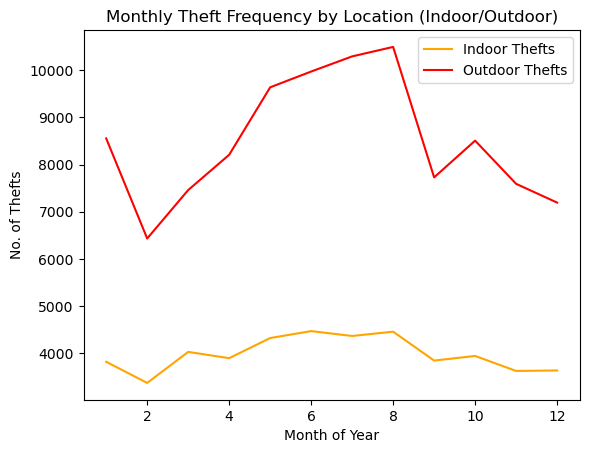

In [14]:
df_total['month'] = pd.DatetimeIndex(df_total['CrimeDate']).month # Create new column month with all months from CrimeDate
indoor_thefts = df_total.loc[df_total['Indoor'] == 1] # Filter for indoor thefts
indoor_thefts_month = indoor_thefts.groupby(['month']).sum() # Sum up the total indoor thefts per month
indoor_thefts_month = indoor_thefts_month.reset_index() # Reset the index
outdoor_thefts = df_total.loc[df_total['Indoor'] == 0] # Filter for outdoor thefts
outdoor_thefts_month = outdoor_thefts.groupby(['month']).sum() # Sum up the total outdoor thefts per month
outdoor_thefts_month = outdoor_thefts_month.reset_index() # Reset the index

# Create the Monthly Theft Frequency by Location (Indoor/Outdoor) line plot
plt.plot(indoor_thefts_month['month'], indoor_thefts_month['Theft'],
         label = "Indoor Thefts", color ='orange') # Graph the indoor thefts line 
plt.plot(outdoor_thefts_month['month'], outdoor_thefts_month['Theft'],
         label = "Outdoor Thefts", color = 'red') # Graph the outdoor thefts line
plt.xlabel("Month of Year") # Label the x-axis
plt.ylabel("No. of Thefts") # Label the y-axis
plt.title("Monthly Theft Frequency by Location (Indoor/Outdoor)") # Title the graph
plt.legend(loc = 'upper right', prop = {'size': 10}) # Adjust the legend to fit the graph
plt.show() # Present the Monthly Theft Frequency By Location (Indoor/Outdoor) line chart

The line chart above depicts the relationship between the number of thefts and the month of the year that they occur in for both indoor and outdoor thefts. As distinguished by the legend in the top right, indoor thefts are orange and outdoor thefts are red. We can see that the frequency of indoor thefts is much lower than that of outdoor thefts for all months of the year. The thefts in the dataset are very heavily automobile focused. Oftentimes, vehicles are parked outside either in an open parking lot or driveway. The exposure to the world makes it much easier to steal parts of vehicles, or even the whole vehicle itself. To this end, the significantly higher frequency for outdoor thefts along with lower levels of indoor theft could be due to the heavy involvement of vehicles during theft.

Interestingly enough, there is a large decrease in thefts for the winter months, especially February. Once again, this can be attested to our claim that colder temperatures in the winter discourage outdoor theft from happening due to the exposure to the weather. Contrarily, the theft frequency also starts to rise in the summer months. This aligns with our belief that relatively warmer temperatures present more theft opportunity. Although extremely hot temperatures discourage theft, Baltimore is a maritime climate that does not experience frequently unbearable heat during most summers.

So, what do these patterns tell us? They simply reinforce our research question by accentuating the association that temperature and indoor/outdoor locations have with theft frequency.

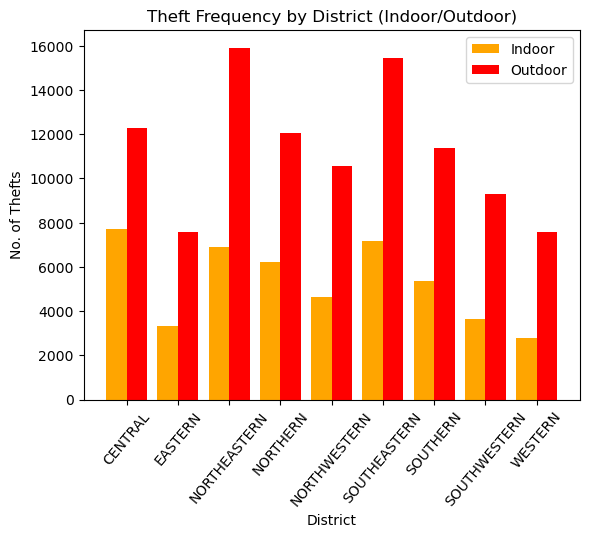

In [15]:
grouped = df_total.groupby(['District', 'Indoor']).sum() # Group by district and indoor/outdoor to count how many indoor and outdoor thefts per district
grouped.drop(columns = ['temp', 'month'], inplace = True) # Drop the temp and month columns
grouped = grouped.reset_index() # Reset the index
labels = list(grouped['District'].unique()) # Make a list of unique districts
indoor = list(np.array(grouped.loc[grouped['Indoor'] == 1]['Theft'])) # Make a list of all indoor thefts
outdoor = list(np.array(grouped.loc[grouped['Indoor'] == 0]['Theft'])) # Make a list of all outdoor thefts

# Create the Theft Frequency by District (Indoor/Outdoor) bar chart
x = np.arange(9) # Assign a variable to range through all districts
width = 0.4 # Set bar width

# Plot data in grouped manner of indoor/outdoor bar type
plt.bar(x - width/2, indoor, width, color='orange') # Make indoor theft bars
plt.bar(x + width/2, outdoor, width, color='red') # Make outdoor theft bars
plt.xticks(x, labels, rotation = 50) # Rotate the district labels to fit x-axis 
plt.xlabel("District") # Label the x-axis
plt.ylabel("No. of Thefts") # Label the y-axis
plt.title("Theft Frequency by District (Indoor/Outdoor)") # Title the graph
plt.legend(['Indoor', 'Outdoor']) # Make the legend
plt.show() # Present the Theft Frequency By District (Indoor/Outdoor) bar chart

The bar chart above distinguishes the difference between indoor and outdoor when studying the relationship of the number of thefts and the district of occurence. By grouping the data on both indoor/outdoor and district, we can see the relationship between the variables all at once. The legend in the top right distinguishes that indoor thefts are orange and outdoor thefts are red. In every district, it is apparent that the number of outdoor thefts is higher than the number of indoor thefts by a noticeable margin. Once again, this can be related back to our logic that thefts in this dataset occur more outdoors, possibly due to the heavy proportion of thefts involving vehicles or vehicle parts.

Danger wise, Northeastern is the district most prone to aggregate theft at almost 16,000 recorded thefts, supporting our findings from the respective summary statistics table above. Southeastern also shows high levels of both types of thefts, reaching levels just around the Northeastern district. It is also important to note that the Central district has the highest number of indoor thefts reaching just below 8,000, but this level is very comparable to that offered by the Northeastern and Southeastern districts.

In terms of safety, the Eastern and Western parts of Baltimore experience lower levels of outdoor theft at approximately  8,000 recorded instances and indoor theft at around the 3,000 level. This could be attested to the presence of more suburbs on the Eastern and Western parts of Baltimore or differences in population density across districts.

Supporting the research question, these patterns suggest that outdoor areas are more susceptible to theft in the highest risk districts of Northeastern and Southeastern. The trend of outdoor locations being more susceptible to theft holds true for the Eastern and Western districts, but these districts are all around safer as well.

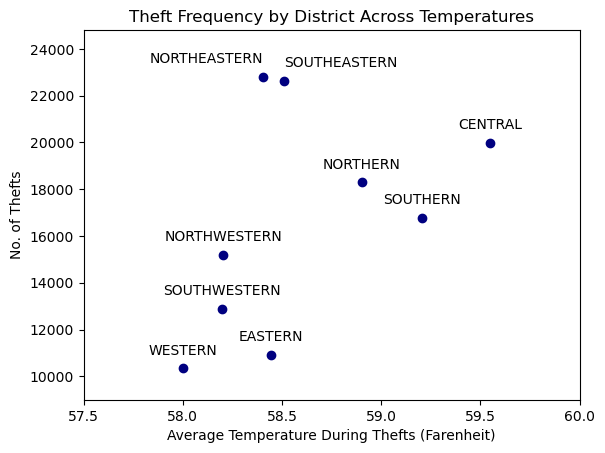

In [16]:
thefts = df_total.loc[df_total['Theft'] == 1] # Filter for only thefts
thefts_by_district = thefts.groupby(['District']).sum() # Sum up the total amount of thefts per district
thefts_by_district.drop(columns = ['temp', 'month', 'Indoor'], inplace = True) # Drop irrelevant variables
thefts_by_district = thefts_by_district.reset_index() # Reset the index
temps = thefts.groupby(['District']).mean() # Get the averages for all variables per district
temps.drop(columns = ['Theft', 'month', 'Indoor'], inplace = True) # Drop irrelevant variables
temps = temps.reset_index() # Reset the index
districts = thefts_by_district['District'] # Get a list of all nine districts
thefts = thefts_by_district['Theft'] # Get a list of the number of thefts indexed on district
temp_values = temps['temp'] # Get a list of all temperatures indexed on district

# Create the Theft Frequency by District Across Temperatures scatter plot
fig, ax = plt.subplots()
ax.scatter(temp_values, thefts, color = 'navy')

# For loop through to determine where the distict labels are set relative to the point
for i, txt in enumerate(districts):
    if txt == 'SOUTHEASTERN': 
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='left',
                  textcoords="offset points", xytext=(0,10))

    elif txt == 'NORTHEASTERN': 
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='right',
                  textcoords="offset points", xytext=(0,10))

    else:
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='center',
                  textcoords="offset points", xytext=(0,10))

plt.xlabel("Average Temperature During Thefts (Farenheit)") # Label the x-axis
plt.ylabel("No. of Thefts") # Label the y-axis
plt.title('Theft Frequency by District Across Temperatures') # Title the graph
plt.ylim(9000,24800) # Set the range of the y-axis
plt.xlim(57.5,60) # Set the range of the x-axis
plt.show() # Present the Theft Frequency By District Across Temperatures scatterplot

In the scatterplot above, we can observe the relationship between the number of thefts and each respective district across a limited range of temperatures. Right away, we can tell that magnitude of variation in the temperature x-axis is negligible, inferring that theft does not vary across temperatures between districts much.

Next, the scatterplot does a good job at depicting the higher and lower outliers. In terms of total aggregate theft (indoors and outdoors), the Northeastern and Southeastern districts reached astronimical levels at just about 23,000 recorded thefts. On the other hand, the Western and Eastern districts showed the polar opposite by totaling aggregate thefts out to only roughly 11,000 recorded instances. 

So, how does this further the research question? The scatterplot data instates that there is little temperature variation during crimes across districts by really emphasizing on the insignificance of this relationship through the narrow x-axis. It also shows us the districts with the most (Northeastern and Southeastern) and least (Western and Eastern) total theft.

# Project Two

## The Message
This project attempts to convey the message that Baltimore theft levels are too high and need to be punished with higher rates of arrest at the police district level. It will successfully do this by highlighting a multitude of variables through innovative visualization techniques such as graphs and maps.

The graphs will depict this message by portraying theft rates, theft arrest rates. and crime arrest rates. A first graph will visually compare the two metrics of crime arrest rate and theft arrest rate by district. This data will be interesting as it will provide insight to how on par specific Baltimore police departments are with theft arrests compared to crime arrests. Additionally, a second graph will compare theft rate against theft arrest rate by district. This data will be interesting as it will depict that certain police districts in Baltimore do a better job at arresting thieves than others.

The maps will communicate this message by providing visible insight on theft frequency, theft rate, share of theft, theft arrest rate, and crime arrest rate. These visuals will touch upon many of the same conclusions drawn from the graphs, but will further complement them by presenting combinations of these variables with visual depictions of Baltimore. This data will advance our findings one step further by incorporating new types of visuals that are both logical and appealing to look at.

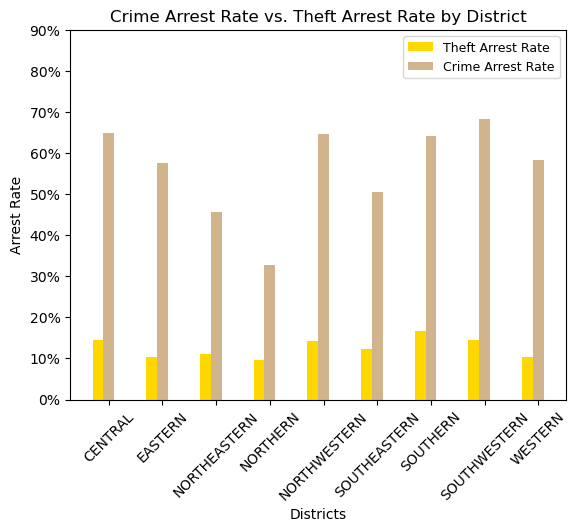

In [17]:
x = np.arange(9) # Get the number of independent variables
y1 = final_arrests_table['Theft Arrest Rate'] # Define which independent variables are used
y2 = final_arrests_table['Crime Arrest Rate'] # Define which independent variables are used
width = 0.2 # Set the width
  
# Create the Crime Arrest Rate vs. Theft Arrest Rate by District bar chart
plt.bar(x-0.2, y1, width, color='gold')
plt.bar(x, y2, width, color='tan')
plt.xticks(x, final_arrests_table['District'], rotation = 45)
plt.title('Crime Arrest Rate vs. Theft Arrest Rate by District')
plt.xlabel("Districts")
plt.ylabel("Arrest Rate")
plt.legend(["Theft Arrest Rate", "Crime Arrest Rate"], prop={'size': 9})
plt.ylim(0, 0.9)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

This bar chart shows the discrepancy between the crime arrest rate and theft arrest rate at the police district level. The large differences between the metrics signify that the Baltimore police departments underperform in arresting thieves, but have better track records at arresting other criminals. This could be the case because theft is typically much more difficult to catch, as this type of crime happens very often and quickly. Most notably, the Southwestern, Northwestern, and Central districts experience the highest crime arrest rates, but all districts tend to underperform at arresting thieves. The variance of arrest rates across districts could be attested to several factors, such as less funding and staffing for certain police districts compared to others. All in all, it is a reasonable request for each police department to increase their theft arrest rate to levels closer to that of the crime arrest rate. By doing this, the higher chance of punishment would directly discourage theft and keep communities safer.

In terms of the message, we can see that the Baltimore police districts do an inadequate job at keeping theft arrest rates on par with crime arrest rates. In the future, this problem could exacerbate as thefts become more prevalent due to the lower chances of being caught and punished. To avoid this, the police districts must tighten their authorization and successfully arrest more thieves.

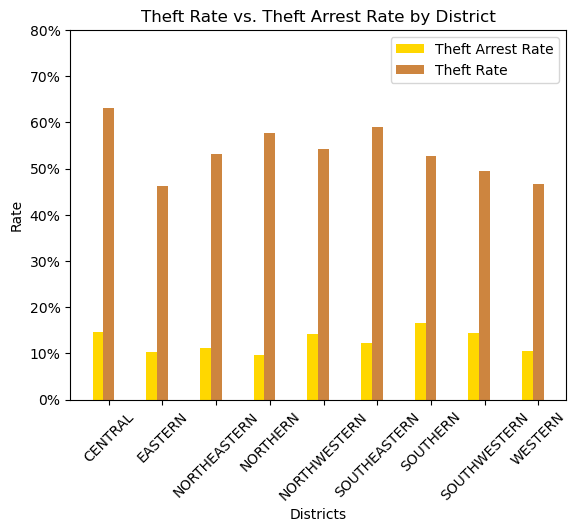

In [18]:
x = np.arange(9) # Get the number of independent variables
y1 = final_arrests_table['Theft Arrest Rate'] # Define which independent variables are used
y2 = final_arrests_table['Theft Rate'] # Define which independent variables are used
width = 0.2 # Set the width
  
# Create the Theft Rate vs. Theft Arrest Rate by District bar chart
plt.bar(x-0.2, y1, width, color='gold')
plt.bar(x, y2, width, color='peru')
plt.xticks(x, final_arrests_table['District'], rotation = 45)
plt.title('Theft Rate vs. Theft Arrest Rate by District')
plt.xlabel("Districts")
plt.ylabel("Rate")
plt.ylim(0,0.8)
plt.legend(["Theft Arrest Rate", "Theft Rate"])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

This bar chart shows the discrepancy between the theft rate and the theft arrest rate at the police district level. The large differences in the two metrics signify the poor performance by police departments in arresting thieves. Ideally, a high-performing and proactive police department would be able to produce theft arrest rates that are at least equal to if not higher than the theft rate. In this case, it would signify that the police are catching and punishing most thieves for their crimes. However, this is not the case in the data, as we can see higher theft rates than theft arrest rates by at least 30% more for each district. Hence, the graph serves as direct proof that the Baltimore police departments need to catch and arrest more thieves across the districts.

Relating back to our message, we can clearly tell that not only are theft levels and rates too high, but the punishment  through arrest rates are scarily low for these thieves. This is harmful as guilty thieves getting away with their wrongdoings could further encourage younger generations to follow the same criminal lifestyle. As a result, this is a massive societal problem that poses a threat to Baltimore's safety not only in the present, but in the future as well.

## Maps and Interpretations

In [19]:
# Create the Theft Frequency heat map
def makeHeatMap(default_location = [39.30364, -76.6139599], default_zoom_start = 11.5):
    heat_map = folium.Map(location = default_location, control_scale = True,
                          zoom_start = default_zoom_start)
    return heat_map
heat_map = makeHeatMap()
df_weapon['count'] = 1 # Set a column count equal to one for every observation
df_weapon = df_weapon.loc[(df_weapon['Theft'] == 1)] # Filter the dataframe for only thefts
HeatMap(data = df_weapon[['Latitude', 'Longitude', 'count']]
        .groupby(['Latitude', 'Longitude'])
        .sum().reset_index().values.tolist(), radius = 8, max_zoom = 12).add_to(heat_map)

# Create a new directory to save the heatmap file to
directory = '/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Assignments/Projects'
os.makedirs(directory, exist_ok=True)

# Save the heatmap as an HTML file in the new directory
filename = 'heatmap.html'
filepath = os.path.join(directory, filename)
heat_map.save(filepath)

heat_map # Present the Theft Frequency heat map

***Theft Frequency Heat Map Link***: *https://rhu2002.github.io/ECO225-Project-2-Heat-Map/heatmap.html*

*To interact with the visual, please refer to the Theft Frequency Heat Map Link right above.*

The heat map above presents visualization regarding theft frequency and indoor/outdoor location. It is useful because it provides an interactive visualization tool that displays the frequency of thefts across Baltimore. Right away, we can see that areas with higher frequencies of theft are more concentrated in shades of neon green. Realistically, this makes sense that that the highest theft frequencies are found in urban locations of the city, as there is normally a somewhat positive correlation between population density and theft frequency. This could be attested to a variety of reasons: more people to steal from, more people to act as thieves, a busier city serving as a distraction, and more. Another notable trend that is worth pointing out is that there seem to be very minimal thefts conducted on highways (red roads). Again, this makes sense as thefts typically do not occur in crowded, fast-paced environments. These areas are also normally patrolled by police units, which also may discourage thieves from breaking the law.

The map supports the message by showing that theft frequencies are too high and abundant across the city. It also reinforces our research question by portraying the same relation between theft frequency and indoor/outdoor location: outdoor locations are more prone to theft than indoor locations. The visualization supports this finding that outdoor locations are more susceptible to theft by portraying most of the theft occurences happening outdoors in areas such as streets and parks, as opposed to inside large institutions or buildings. Overall, the general trend shown by the heat map is that thefts occur more frequently in outdoor environments, especially when there is minimal police surveillance.

In terms of outlier locations, highways, cemetaries, and university campuses contrast our previous claim that outdoor locations are more theft-prone. Although these three types of locations are situated outdoors, they have certain factors that make them unappealing to thieves. As briefly mentioned above, highways are normally fast-paced environments with alert drivers on the move and high police surveillance. Similarly, universities also tend to spend a lot of money to ensure the safety of students through strong campus security. Therefore, it is reasonable to assume that thefts occur less in these locations due to the higher levels of surveillance. Lastly, cemetaries are normally low population density areas offering little to no monetary resources, making them unappealing to thieves in the first place.

Potential next steps include studying the root causes of these thefts through regressions on several possible variables: education, income, population, and more. By using regressions to identify these causal relationships later on, we can provide valuable information to the Baltimore police departments on what factors to focus on in order to decrease theft frequencies.

### Merging With a New Dataset

In [20]:
# Set up the geodataframe for mapping
district_thefts = df.groupby('District')['Theft'].sum() # Sum up the total thefts by district
bal_df = bal_df.to_crs(epsg = 4326) # Adjust the EPSG to match the original dataframe
bal_df = bal_df.merge(district_thefts, left_on = 'DISTRICT',
                      right_on = 'District', how = 'inner') # Merge the dataframes
bal_df['Share of Theft'] = bal_df['Theft'] / bal_df['Theft'].sum() # Calculate share of theft
bal_df['Share of Theft'] = bal_df['Share of Theft'] * 100 # Convert the share of theft to percentages
arrest_df['District Upper'] = arrest_df['District'].str.upper() # Convert the districts to uppercase to match the dataframe
arrest_df['District Upper'] = arrest_df['District Upper'].replace(['NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST'],
                                                      ['NORTHEASTERN', 'NORTHWESTERN', 'SOUTHEASTERN', 'SOUTHWESTERN']) # Match the district names
district_arrests = arrest_df.groupby('District Upper')['Arrest_Theft'].sum() # Sum up the arrest thefts by district
bal_df = bal_df.merge(district_arrests, left_on = 'DISTRICT',
                      right_on = 'District Upper', how = 'left') # Merge the dataframes
bal_df['Theft Arrest Rate'] = bal_df['Arrest_Theft'] / bal_df['Theft'] # Calculate theft arrest rate
bal_df['Theft Arrest Rate'] = bal_df['Theft Arrest Rate'] * 100 # Convert the theft arrest rates to percentages
total_crime_arrest_rate = final_arrests_table['Crime Arrest Rate'] # Create the crime arrest rate series
bal_df = bal_df.join(total_crime_arrest_rate) # Join the series onto the dataframe
bal_df['Crime Arrest Rate'] = bal_df['Crime Arrest Rate'] * 100 # Convert the crime arrest rates to percentages
theft_rate = final_arrests_table['Theft Rate'] # Create the theft rate series
bal_df = bal_df.join(theft_rate) # Join the series onto the dataframe
bal_df['Theft Rate'] = bal_df['Theft Rate'] * 100 # Convert the theft rates to percentages

In terms of merging, the original Crime in Baltimore dataframe was merged with both the Baltimore Arrest dataframe and the Baltimore Police District Boundaries dataframe. This merged dataframe was utilized to calculate a handful of rates: theft rate, share of theft, theft arrest rate, and crime arrest rate. After these rates were properly calculated and grouped by the geographic level of police district, we performed additional merge and join functions to combine these series' to our Baltimore Police District Boundaries data.

The source of the Baltimore Arrest data is the Baltimore police department website. Since the Baltimore police department releases open data for several metrics, the district levels stayed consistent. This presented a perfect opportunity to provide newfound insight on arrest data through maps. The Baltimore police department is a highly reputable source as it also provided our original Crime in Baltimore dataframe.

The source of the Baltimore Police District Boundaries data is ArcGIS. This source provides value and relevance to the research question because it presents a shapefile map with the same geographic level as one of the dependent variables: police district. In terms of credibility, it is quite reputable as it was created by an avid ArcGIS user in 2017. This map assists us in outlining the borders of each police district, allowing for clearer interpretation and visualization within the boundaries. In order to properly load the data into the map, the EPSG was adjusted to match the original Crime in Baltimore dataframe.

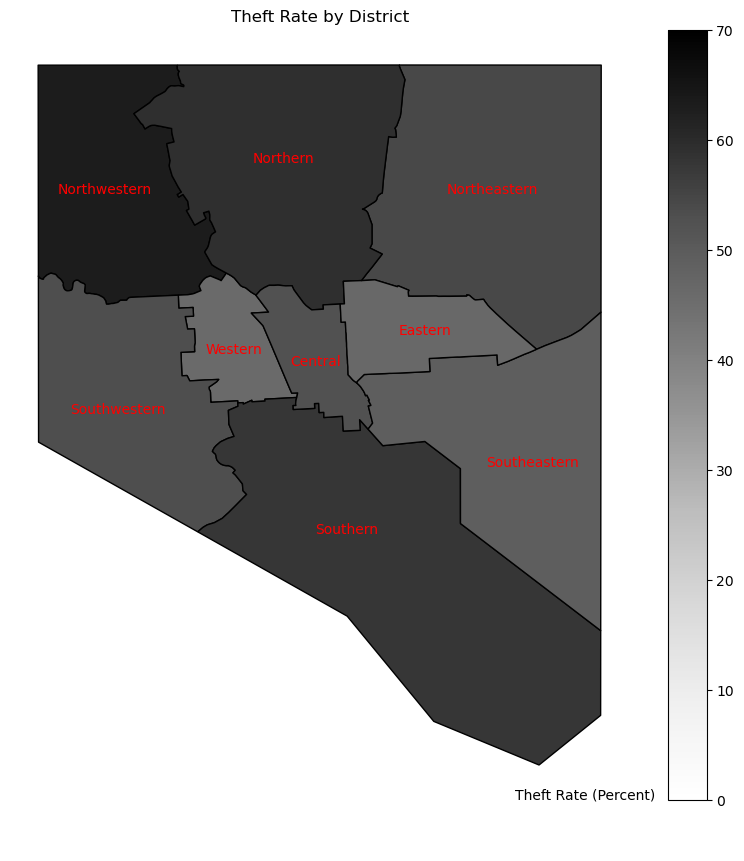

In [21]:
# Create the Theft Rate by District map
fig, gax = plt.subplots(figsize=(10, 10))

bal_df.plot(
    ax=gax, edgecolor='black', column='Theft Rate', legend=True,
    cmap='Greys',
    vmin=0, vmax=70 # Range of your column value for the color legend
)
gax.annotate('Theft Rate (Percent)', xy=(0.515, 0.062), xycoords='figure fraction')
gax.annotate('Northwestern', xy=(-76.70500, 39.34000), color='Red')
gax.annotate('Northern', xy=(-76.64200, 39.34768), color='Red')
gax.annotate('Northeastern', xy=(-76.57950, 39.34000), color='Red')
gax.annotate('Western', xy=(-76.65722, 39.30000), color='Red')
gax.annotate('Central', xy=(-76.62989, 39.29700), color='Red')
gax.annotate('Eastern', xy=(-76.59497, 39.30473), color='Red')
gax.annotate('Southwestern', xy=(-76.70105, 39.28500), color='Red')
gax.annotate('Southeastern', xy=(-76.56690, 39.27169), color='Red')
gax.annotate('Southern', xy=(-76.62200, 39.25500), color='Red')

plt.title('Theft Rate by District')
plt.axis('off')
plt.show()

The map above shows visualization about Baltimore's theft rate in percentages at the police district level. The theft rate is a useful metric to map as it signifies the percentage of crimes that were thefts in a specific district. From the key index on the right, we can clearly tell that higher theft rates are represented by darker shades of grey, whereas lower theft rates are represented by lighter shades of grey. Hence, we can tell that the Northwestern district experienced the highest proportion of thefts to crimes, reaching levels just above 63%. At the other end, the Western and Eastern districts encountered the lowest proportion of thefts to crimes, with both at approximately 46%. This means that thefts made up less than half of the crimes in these two districts. Districts within close proximity experienced varying theft rates, showing that theft rates associated with specific police districts. This relationship could be due to various factors such as neighborhood danger levels or income and education differences across districts.

The map conveys analagous hypotheses to our research question and message depicting that theft levels are too high across all the Baltimore police districts. Overall, theft proportion of crime ranged from 40-65% across all nine districts, showing the high abundance of theft. In most districts, every 2 crimes committed involved at least 1 theft. This is a major problem as Baltimore residents are extremely prone to being targeted in these thefts, posing a grave risk to their safety and monetary belongings.

Potential next steps include using regressions to study what type of variables cause theft rates to increase across districts. By using regressions to identify these causal relationships later on, we can provide valuable information to the Baltimore police departments on what factors to focus on in order to decrease theft rates across districts.

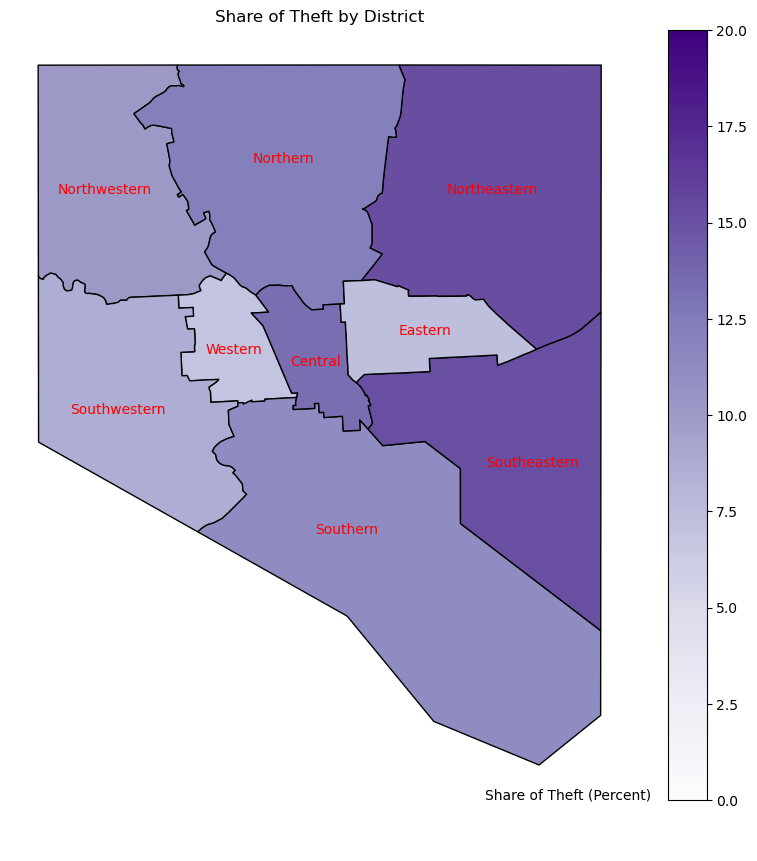

In [22]:
# Create the Share of Theft by District map
fig, gax = plt.subplots(figsize=(10, 10))

bal_df.plot(
    ax=gax, edgecolor='black', column='Share of Theft', legend=True,
    cmap='Purples',
    vmin=0, vmax=20 # Range of your column value for the color legend
)
gax.annotate('Share of Theft (Percent)', xy=(0.485, 0.062), xycoords='figure fraction')
gax.annotate('Northwestern', xy=(-76.70500, 39.34000), color='Red')
gax.annotate('Northern', xy=(-76.64200, 39.34768), color='Red')
gax.annotate('Northeastern', xy=(-76.57950, 39.34000), color='Red')
gax.annotate('Western', xy=(-76.65722, 39.30000), color='Red')
gax.annotate('Central', xy=(-76.62989, 39.29700), color='Red')
gax.annotate('Eastern', xy=(-76.59497, 39.30473), color='Red')
gax.annotate('Southwestern', xy=(-76.70105, 39.28500), color='Red')
gax.annotate('Southeastern', xy=(-76.56690, 39.27169), color='Red')
gax.annotate('Southern', xy=(-76.62200, 39.25500), color='Red')

plt.title('Share of Theft by District')
plt.axis('off')
plt.show()

The map above shows visualization about Baltimore's share of theft in percentages at the police district level. The share of theft is a useful metric to map as it signifies the percentage of thefts that occured in a specific district. From the key index on the right, we can clearly tell that higher share of theft is represented by darker shades of purple, whereas lower share of theft is represented by lighter shades of purple. With that in mind, we can conclude that the Northeastern and Southeastern districts experienced the most thefts, combining to over 30% of all thefts. On the contrary, the Western and Eastern districts experienced the least thefts, totaling to just merely 14% of all thefts. It is very interesting and worth noting the strong contrast and change in share of theft between neighboring districts such as Southeastern and Eastern. Clearly, district borders are a determinant of this rate, potentially due to factors such as neighborhood danger levels or police surveillance levels in specific districts.

The map conveys similar implications to our research question and message portraying that thefts are more prominent in certain districts than others. It depicts that the Northeastern and Southeastern districts are the most dangerous, while the Western and Eastern districts are the least dangerous. We can clearly see that both the Northeastern and Southeastern district are extremely dangerous with high theft frequencies and share of thefts, while both the Western and Eastern district are relatively safe with low theft frequencies and share of thefts. Hence, the visual data reinforces our previous findings and does not present any outliers.

Potential next steps include using regressions to study what type of variables cause share of theft to fluctuate across districts. By using regressions to identify these causal relationships later on, we can provide valuable information to the Baltimore police departments on what factors to focus on in order to prevent the share of theft gap from widening across districts.

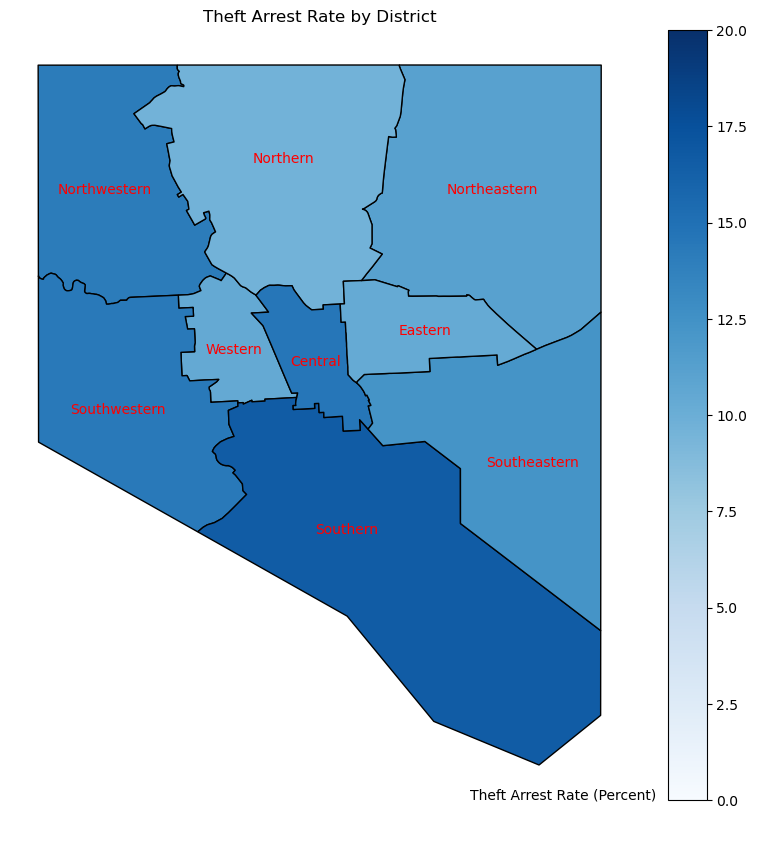

In [23]:
# Create the Theft Arrest Rate by District map
fig, gax = plt.subplots(figsize=(10, 10))

bal_df.plot(
    ax=gax, edgecolor='black', column='Theft Arrest Rate', legend=True,
    cmap='Blues',
    vmin=0, vmax=20 # Range of your column value for the color legend
)
gax.annotate('Theft Arrest Rate (Percent)', xy=(0.470, 0.062), xycoords='figure fraction')
gax.annotate('Northwestern', xy=(-76.70500, 39.34000), color='Red')
gax.annotate('Northern', xy=(-76.64200, 39.34768), color='Red')
gax.annotate('Northeastern', xy=(-76.57950, 39.34000), color='Red')
gax.annotate('Western', xy=(-76.65722, 39.30000), color='Red')
gax.annotate('Central', xy=(-76.62989, 39.29700), color='Red')
gax.annotate('Eastern', xy=(-76.59497, 39.30473), color='Red')
gax.annotate('Southwestern', xy=(-76.70105, 39.28500), color='Red')
gax.annotate('Southeastern', xy=(-76.56690, 39.27169), color='Red')
gax.annotate('Southern', xy=(-76.62200, 39.25500), color='Red')

plt.title('Theft Arrest Rate by District')
plt.axis('off')
plt.show()

The map above shows visualization about Baltimore's theft arrest rate in percentages at the police district level. The theft arrest rate is a useful metric to map as it signifies police districts' performances in arresting thieves. From the key index on the right, we can clearly tell that higher theft arrest rates are represented by darker shades of blue, whereas lower theft arrest rates are represented by lighter shades of blue. Hence, we can clearly see that the Southern police district was the best at arresting thieves, with the highest theft arrest rate at just over 16%. Conversely, the map portrays that the Northern district was the worst at arresting thieves, with a rate just below 10%. Geographically, there is noticeable contrast between theft arrest rates across neighboring districts. This fluctuation in theft arrest rates among differing police districts could be attested to several variables such as staffing, equipment, surveillance quality, and more.

The theft arrest rate is a new concept introduced in our message. In our message, we touched upon how theft arrest rates need to increase to impose legal consequences on more thieves. This idea remains prevalent in our map, as we can see that the index maxes out at a ceiling of 20%. This mean that there were no district theft arrest rates that were greater than 20%, meaning that every 5 thefts resulted in 1 or less arrests. From a protection standpoint, these numbers are unacceptable as they jeopardize the safety of the Baltimore community.

Potential next steps include using regressions to study what type of variables cause theft arrest rates to decrease across districts. By using regressions to identify these causal relationships later on, we can provide valuable information to the Baltimore police departments on what factors to focus on in order to increase theft arrest rates across districts.

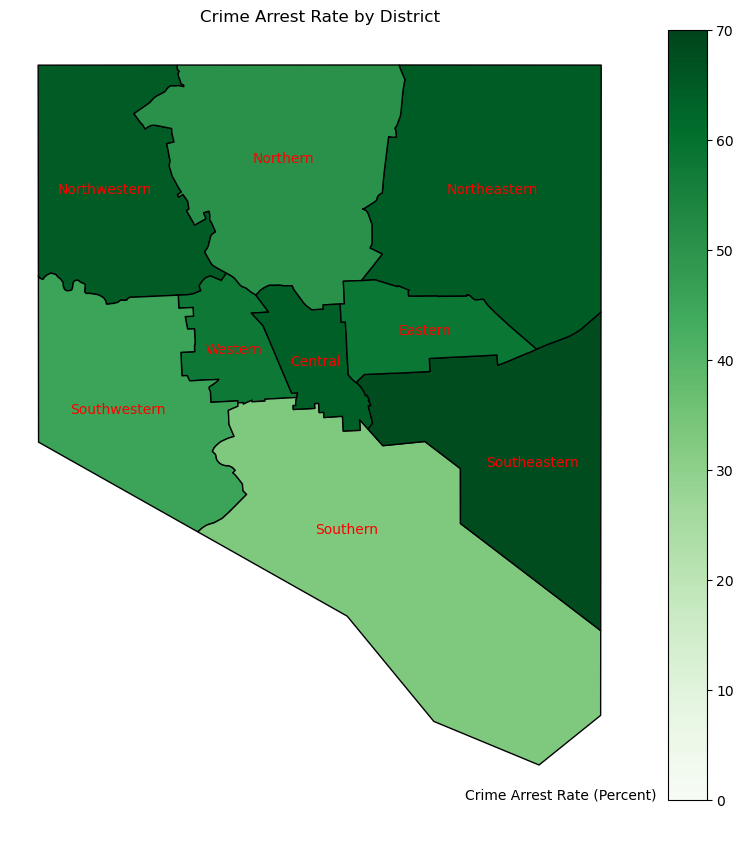

In [24]:
# Create the Crime Arrest Rate by District map
fig, gax = plt.subplots(figsize=(10, 10))

bal_df.plot(
    ax=gax, edgecolor='black', column='Crime Arrest Rate', legend=True,
    cmap='Greens',
    vmin=0, vmax=70 # Range of your column value for the color legend
)
gax.annotate('Crime Arrest Rate (Percent)', xy=(0.465, 0.062), xycoords='figure fraction')
gax.annotate('Northwestern', xy=(-76.70500, 39.34000), color='Red')
gax.annotate('Northern', xy=(-76.64200, 39.34768), color='Red')
gax.annotate('Northeastern', xy=(-76.57950, 39.34000), color='Red')
gax.annotate('Western', xy=(-76.65722, 39.30000), color='Red')
gax.annotate('Central', xy=(-76.62989, 39.29700), color='Red')
gax.annotate('Eastern', xy=(-76.59497, 39.30473), color='Red')
gax.annotate('Southwestern', xy=(-76.70105, 39.28500), color='Red')
gax.annotate('Southeastern', xy=(-76.56690, 39.27169), color='Red')
gax.annotate('Southern', xy=(-76.62200, 39.25500), color='Red')

plt.title('Crime Arrest Rate by District')
plt.axis('off')
plt.show()

The map above shows visualization about Baltimore's crime arrest rate in percentages at the police district level. The crime arrest rate is a useful metric to map as it signifies police districts' performances in arresting criminals. From the key index on the right, we can clearly tell that higher crime arrest rates are represented by darker shades of green, whereas lower crime arrest rates are represented by lighter shades of green. From this, we can easily tell that the Southeastern district had the highest crime arrest rate, at just above 68%. On the opposing end, it is clear that the Southern district had the lowest crime arrest rate, at just below 33%. The fluctuation in crime arrest rates across districts could be attested to several variables such as staffing, equipment, surveillance quality, and more.

The crime arrest rate is a new concept introduced in our message. In our message, we touched upon how theft arrest rates need to increase to impose legal consequences on more thieves. By introducing crime arrest rates, we are able to benchmark theft arrest rates against a similar metric, ultimately allowing us to gage police districts' theft arrest performance against their crime arrest performance. As we can clearly see, police districts do a much better job at arresting general criminals rather than thieves. The reason for this could be due to the higher difficulty to recognize and arrest a thief, since thefts are normally quicker and more subtle than typical crimes.

Potential next steps include using regressions to study what type of variables cause crime arrest rates to decrease across districts. By using regressions to identify these causal relationships later on, we can provide valuable information to the Baltimore police departments on what factors to focus on in order to increase crime arrest rates across districts.

## Conclusion

In conclusion, there is a correlation between theft frequency and temperature, indoor/outdoor locations, police districts, and time of crime. More extreme temperatures - both hot and cold - tend to discourage theft, along with having less eligible days for theft. Outdoor thefts have prominence over indoor thefts, potentially due to automobile related thefts dominating the dataset. The most dangerous districts for both indoor and outdoor theft were Northeastern and Southeastern, with the safest districts being Eastern and Western. The temperature variation during thefts across districts was negligible due to the insignificant differences in Farenheit. Theft frequencies started to rise and peak during night hours and sunset, whereas they started to bottom out during early hours of the day accompanied by sunrise.

The addition of four more dependent variables allows us to gage Baltimore district safety from various perspectives and metrics. At the police district level, we can see just how much variance there really is among theft rates, share of thefts, theft arrest rates, and crime arrest rates. To reiterate, the differences in these rates could be caused by several variables. Police district funding, staffing, surveillance quality, and work hours are all potential reasons that could contribute to these differing rates. By focusing on the geographic level of police district, we are able to identify areas of weakness that require attention. From here, we can diagnose the problems and test their causality through regression later on.

Although many of the conclusions formed seem intuitive, it is important to be cautious of the possibility of endogeneity bias and ommitted variable bias. For instance, the low theft frequencies during hot and cold temperatures could simply be due to only a few days of each year reaching those peak and bottom temperature levels, but this rationale is not easily captured by the graph. Another example is that certain districts may have unobserved characteristics that result in their varying crime metric rates. A few examples of these unobserved characteristics include income, education, and population. Without the use of regression, instrumental variables, or any empirical analysis tools at this time, we can only conclude correlation and not causation.

To that end, the research question and message remain open to further advancements. The next section will highlight future steps for this research project.

## Future Steps

Future steps in this project could include and are not limited to the addition of empirical and statistical tools such as standard multiple regression, instrumental variables, differences-in-differences, regression discontinuity, and more. In order to do this, it may be neccesary to web scrape relevant data from various sources later on. To empower these ambitious goals, we hope to utilize innovative machine learning techniques that enforce practical standard operating procedures in the near future.

## Works Cited

"Baltimore Police District Boundaries." Arcgis.com. 2023. https://utoronto.maps.arcgis.com/home/item.html?id=ff273131ddad430cb543f7a875034607.

“BPD Arrests.” n.d. Data.baltimorecity.gov. Accessed February 26, 2023. https://data.baltimorecity.gov/datasets/bpd-arrests/explore?location=38.977181%2C-76.515650%2C8.93.

“Crime/Law Enforcement Stats (UCR Program).” n.d. Federal Bureau of Investigation. https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr.

Dane, Sohier. 2018. Review of "Crime in Baltimore". Edited by Sohier Dane. Crime Data for 2012 - 2017, February. https://www.kaggle.com/datasets/sohier/crime-in-baltimore.

Glaeser, Edward L., and Bruce Sacerdote. 1999. “Why Is There More Crime in Cities?” Journal of Political Economy 107 (S6): S225–58. https://doi.org/10.1086/250109.

“Maryland Misdemeanor and Felony Theft and Shoplifting Laws.” n.d. Www.criminaldefenselawyer.com. https://www.criminaldefenselawyer.com/resources/criminal-defense/crime-penalties/petty-theft-maryland-penalties-defense#:~:text=A%20person%20commits%20theft%20in.

“Most Dangerous Cities in the US.” n.d. PropertyClub. https://propertyclub.nyc/article/most-dangerous-cities-in-the-us.

Visual Crossing Corporation. 2021. “Historical Weather Data & Weather Forecast Data | Visual Crossing.” Visualcrossing.com. 2021. https://www.visualcrossing.com/weather-data.